# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. 

In [1]:
import pandas as pd

## Изучение данных из файла

### Загружаем данные


In [2]:
# Загружаем данные
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Просмотр общей информации


In [3]:
# Общая информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

In [4]:
# Просмотр 5 строчек данных
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Проверяем состав значений полей на явно некорректные значения

In [5]:
# расстояние до ближайшего аэропорта в метрах (м)
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [6]:
# число балконов
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [7]:
# высота потолков (м)
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [8]:
#  расстояние до центра города (м)
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [9]:
#  сколько дней было размещено объявление (от публикации до снятия)
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [10]:
#  дата публикации
data['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

In [11]:
# этаж
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [12]:
# всего этажей в доме
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [13]:
# апартаменты (булев тип)
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [14]:
# Площадь кухни
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [15]:
# цена на момент снятия с публикации
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [16]:
#  жилая площадь в квадратных метрах (м²)
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [17]:
#  название населенного пункта
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
#  свободная планировка (булев тип)
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [19]:
#  число парков в радиусе 3 км
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [20]:
# расстояние до ближайшего парка (м)
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [21]:
# число водоёмов в радиусе 3 км
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [22]:
# расстояние до ближайшего водоёма (м)
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [23]:
# число комнат
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [24]:
# квартира-студия (булев тип)
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [25]:
# площадь квартиры в квадратных метрах (м²)
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [26]:
# число фотографий квартиры в объявлении
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

### Вывод

Всего в данных 23699 записей.  

Есть пропуки следующих полей:
- ceiling_height (высота потолков (м))
- floors_total (всего этажей в доме)
- living_area (жилая площадь в квадратных метрах (м²))
- is_apartment (апартаменты (булев тип))
- kitchen_area (площадь кухни в квадратных метрах (м²))
- balcony (число балконов)
- locality_name (название населённого пункта)
- airports_nearest (расстояние до ближайшего аэропорта в метрах (м))
- cityCenters_nearest ( расстояние до центра города (м))
- parks_around3000 ( число парков в радиусе 3 км)
- parks_nearest   (расстояние до ближайшего парка (м))
- ponds_around3000 (число водоёмов в радиусе 3 км)
- ponds_nearest (расстояние до ближайшего водоёма (м))
- days_exposition (сколько дней было размещено объявление (от публикации до снятия))

Часть полей требуют изменения типа:
- floors_total  (всего этажей в доме) - сейчас float, а должно быть int
- is_apartment(апартаменты (булев тип)) - сейчас object, а должно быть bool 
- balcony (число балконов) - сейчас float, а должно быть int
- airports_nearest  (расстояние до ближайшего аэропорта в метрах (м))  - сейчас float, а должно быть int
- cityCenters_nearest ( расстояние до центра города (м))     - сейчас float, а должно быть int
- parks_around3000  (число парков в радиусе 3 км)        - сейчас float, а должно быть int
- parks_nearest  (расстояние до ближайшего парка (м))       - сейчас float, а должно быть int
- ponds_around3000 (число водоёмов в радиусе 3 км)      - сейчас float, а должно быть int
- ponds_nearest (расстояние до ближайшего водоёма (м))     - сейчас float, а должно быть int
- days_exposition (сколько дней было размещено объявление (от публикации до снятия))  - сейчас float, а должно быть int

Поля не поправилу наименования:
- cityCenters_nearest - переименовать в city_сenters_nearest

Каких либо явных некорректностей в данных не выявлено


## Предобработка данных

Заполняем пропуски в данных, где это возможно и преобразуем значения к правильному типу

### Переимеование полей

In [27]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, inplace = True)

### Заполняем пропуски в данных

In [28]:
# высота потолков (м) - заполняем медианным значением
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [29]:
# всего этажей в доме - оставляем медианным значением, округленного до целого в данных, где этажей не меньше указанного
def get_median_total_floor(row):
    floor  = row['floor']
    if pd.notnull(row['floors_total']):
        median_floor = row['floors_total']
    else:
        median_floor = round(data.query('floor >= @floor')['floors_total'].median(),0)
    return median_floor

data['floors_total'] = data.apply(lambda f: get_median_total_floor(f), axis = 1)

In [30]:
# жилая площадь в квадратных метрах (м²) - заполняем медианным значением
data['living_area'].fillna(data['living_area'].median(), inplace=True)

In [31]:
# апартаменты (булев тип) - заполняем False, как самое часто распространяющееся значение
data['is_apartment'].fillna(False, inplace=True)

In [32]:
# площадь кухни в квадратных метрах (м²) - заполняем медианным значением
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)

In [33]:
# число балконов - заполняем 0
data['balcony'].fillna(0, inplace=True)

In [34]:
# название населённого пункта - заполняем значением "Не заполнено"
data['locality_name'].fillna("Не заполнено", inplace=True)

In [35]:
# расстояние до ближайшего аэропорта в метрах (м) -  оставляем пустым, т.к. может не быть данных
print('Всего пропущенных значений:', len(data[data['airports_nearest'].isna()]))

Всего пропущенных значений: 5542


In [36]:
# расстояние до центра города (м) -  оставляем пустым, т.к. может не быть данных
print('Всего пропущенных значений:', len(data[data['city_centers_nearest'].isna()]))

Всего пропущенных значений: 5519


In [37]:
# число парков в радиусе 3 км  - заполняем 0
data['parks_around3000'].fillna(0, inplace=True)

In [38]:
# расстояние до ближайшего парка (м) -  не заполняем, т.к. может не быть данных
print('Всего пропущенных значений:', len(data[data['parks_nearest'].isna()]))

Всего пропущенных значений: 15620


In [39]:
# число водоёмов в радиусе 3 км  - заполняем 0
data['ponds_around3000'].fillna(0, inplace=True)

In [40]:
# расстояние до ближайшего водоёма (м) - не заполняем, т.к. может не быть данных
print('Всего пропущенных значений:', len(data[data['ponds_nearest'].isna()]))

Всего пропущенных значений: 14589


In [41]:
# сколько дней было размещено объявление (от публикации до снятия)  - заполняем медианным значением
data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)

### Изменение типа данных


In [42]:
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
#data['airports_nearest'] = data['airports_nearest'].astype('int')
#data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
#data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
#data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

In [43]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

### Вывод

- Переименовали одно поле, т.к. оно не соответствовало общим правилам наименование
- Заполнили пропуски в данных. Часть данных заполнили медианными значениями, часть оставили пустыми
- Скоррректировали типы данных

## Расчёты и добавление результатов в таблицу

In [44]:
# Цена м2
data['price_m2'] = data['last_price'] / data['total_area']

In [45]:
# день недели, месяц и год публикации объявления;
data['first_year_exposition'] = data['first_day_exposition'].dt.year
data['first_month_exposition'] = data['first_day_exposition'].dt.month
data['first_weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [46]:
# этаж квартиры; варианты — первый, последний, другой;
def get_floor_title(floor, floors_total):
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'

data['floor_title'] = data.apply(lambda row: get_floor_title(row.floor, row.floors_total), axis=1)

In [47]:
# соотношение жилой и общей площади, а также отношение площади кухни к общей.
data['living_area_coef'] = data['living_area'] / data['total_area']
data['kitchen_area_coef'] = data['kitchen_area'] / data['total_area']

## Исследовательский анализ данных

### Площадь

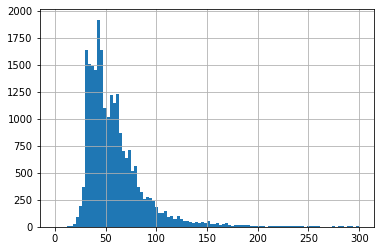

In [48]:
data['total_area'].hist(bins=100, range=(0, 300))

In [49]:
# Средняя площадь квартир
data['total_area'].mean()

60.34865099793241

### Цена

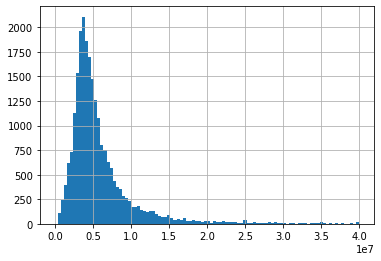

In [50]:
data['last_price'].hist(bins=100, range=(0, 40000000))

In [51]:
# Средняя цена квартир
data['last_price'].mean()

6541548.771551542

### Число комнат

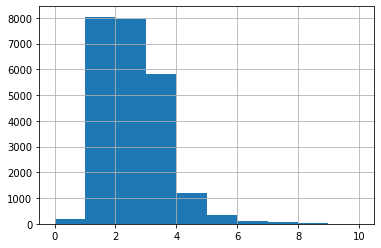

In [52]:
data['rooms'].hist(bins=10, range=(0, 10))

In [53]:
# Среднее число комната квартир
data['rooms'].mean()

2.070635891809781

### Высота потолков

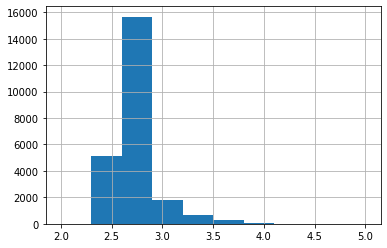

In [54]:
data['ceiling_height'].hist(bins=10, range=(2, 5))

In [55]:
# Средняя высота потолков
data['ceiling_height'].mean()

2.724358411747331

### Время продажи квариры

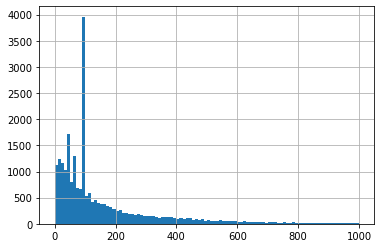

In [56]:
data['days_exposition'].hist(bins=100, range=(0, 1000))

Наблюдаются сильные выборосы выбросы - отличия от распределения Пуассона.  
Построим более детальную диаграмму

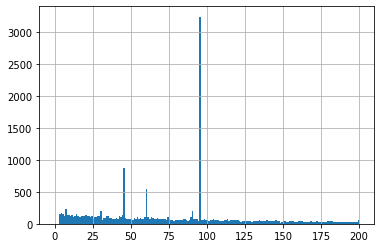

In [57]:
data['days_exposition'].hist(bins=200, range=(0, 200))

Выбросы наблюдаются в районе 40, 60, 100 дней. Возможные причины - автоматическое закрытие объявлений о продаже или ошибки в данных

In [58]:
# Анализируем среднее и медиану
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее - 169 дней  
Медиана - 95 дей   
Очень большое отличие говорит о том, что есть большие выбросы  

In [59]:
# Убираем выбивающиеся значения - где количество больше 200 (75 процентиль)
days_exposition_group = data['days_exposition'].value_counts()
wrong_index = days_exposition_group[days_exposition_group > 200].index
data = data.query('days_exposition not in @wrong_index')

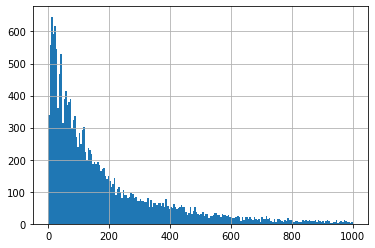

In [60]:
# Строим актуальную диаграмму
data['days_exposition'].hist(bins=200, range=(0, 1000))

In [61]:
# Анализируем среднее и медиану после исправления данных
data['days_exposition'].describe()

count    18390.000000
mean       196.154160
std        227.076141
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры - 196 дней  
Медиана - 114 дней  
Быстрая продажа квартиры - менее 44 дней  
Долгая продажа квартиры - более 259 дней  


### Изучаем зависимость цены (факторы)

In [62]:
# Рассчитываем коэффициент кореляции для требуемых факторов
data[['last_price', 'total_area', 'rooms', 
      'city_centers_nearest', 'first_weekday_exposition', 
      'first_year_exposition', 'first_month_exposition']].corr()

,last_price,total_area,rooms,city_centers_nearest,first_weekday_exposition,first_year_exposition,first_month_exposition
last_price,1.000000,0.643422,0.354786,-0.191220,0.002312,-0.058933,0.001024
total_area,0.643422,1.000000,0.760984,-0.226262,-0.006050,-0.114536,-0.001713
rooms,0.354786,0.760984,1.000000,-0.184821,-0.006937,-0.099582,-0.004718
city_centers_nearest,-0.191220,-0.226262,-0.184821,1.000000,0.011512,0.046714,-0.009804
first_weekday_exposition,0.002312,-0.006050,-0.006937,0.011512,1.000000,0.004775,0.008663
first_year_exposition,-0.058933,-0.114536,-0.099582,0.046714,0.004775,1.000000,-0.183803
first_month_exposition,0.001024,-0.001713,-0.004718,-0.009804,0.008663,-0.183803,1.000000


1. Достаточно сильная корреляция цены от общей площади, что логично
2. Чем дальше от центра, тем цена ниже (обратная корреляция)
3. Количество комнат не сильно влияет на цену, намного меньше, чем общая площадь квартиры
4. Цена от месяца размещения объявления не зависит

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f457d6d90>],
      dtype=object)

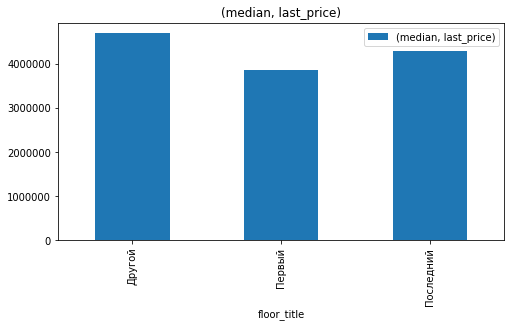

In [63]:
# Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом
data.pivot_table(index='floor_title', values='last_price', aggfunc=['median']).plot(kind='bar', subplots=True,  figsize=(8, 4))

Средняя цена для первого и последнего этажа  ниже. Первый этаж оценивается дешевле последнего

### Изучаем населенные пункты

In [64]:
# 10 населённых пунктов с наибольшим числом объявлений
top_locality = data['locality_name'].value_counts().head(10).index

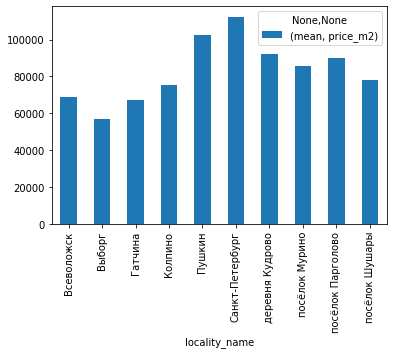

In [65]:
# Средняя цена квадратного метра в этих населённых пунктах
(
    data.query('locality_name in @top_locality')
        .pivot_table(index='locality_name', values='price_m2', aggfunc=['mean'])
        .plot(kind='bar')
)

In [66]:
# Топ 3 самых высоких по стоимости населенных пунктов
(
    data.query('locality_name in @top_locality')
        .pivot_table(index='locality_name', values='price_m2', aggfunc=['mean'])
        .sort_values(('mean', 'price_m2'), ascending=False)
        .head(3)
)

,mean
,price_m2
locality_name,
Санкт-Петербург,112360.505735
Пушкин,102631.686191
деревня Кудрово,92234.338086


In [67]:
# Топ 3 самых дешевых по стоимости населенных пунктов
(
    data.query('locality_name in @top_locality')
        .pivot_table(index='locality_name', values='price_m2', aggfunc=['mean'])
        .sort_values(('mean', 'price_m2'), ascending=False)
        .tail(3)
)

,mean
,price_m2
locality_name,
Всеволожск,68699.199690
Гатчина,67320.761921
Выборг,56983.032233


### Анализ квартир в Санкт-Петербурге

In [68]:
# Выделяем квартиры в питере
data_piter = data.query('locality_name == "Санкт-Петербург"').copy()
print(f'Всего {len(data_piter)} квартир в Санкт_Петербурге')

Всего 12369 квартир в Санкт_Петербурге


In [69]:
# Удаляем пустые значения
data_piter.dropna(subset=['city_centers_nearest'], inplace = True) 

In [70]:
# Рассчитываем удаленность от центра в КМ
data_piter['city_centers_nearest_km'] = (data_piter['city_centers_nearest'] / 1000).round(0)

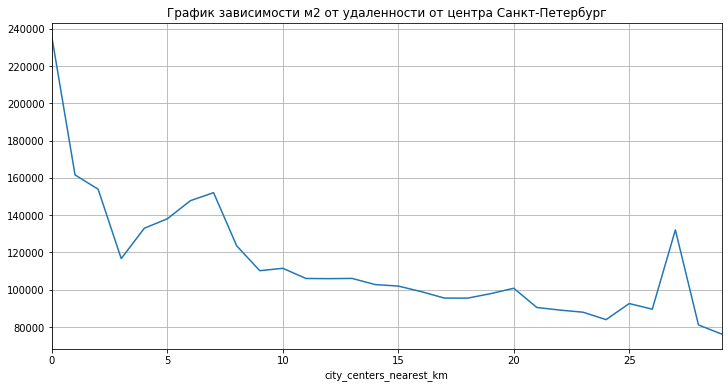

In [71]:
# Средняя цена м2 за каждый км удаленности от центра
(
    data_piter
        .groupby('city_centers_nearest_km')['price_m2']
        .mean()
        .plot(x='last_price', y='city_centers_nearest', grid=True, figsize=(12, 6), 
              title = 'График зависимости м2 от удаленности от центра Санкт-Петербург')
)

Цена сильно уменьшается в районе 3 и 9 км удаленности от центра.  
Есть всплекс цены в районе 27 км удаленности. Возможно какой-то элитный район

### Анализируем сегмент квартир центра

In [72]:
# Граница удаленности от центра
centers_nearest_km = 9

# Выделяем срез данных
data_piter_center = data_piter.query('city_centers_nearest_km <= @centers_nearest_km')
print(f'Всего {len(data_piter_center)} квартир в центре')

Всего 3616 квартир в центре


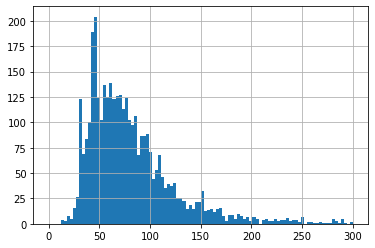

In [73]:
# Изучаем параметры: площадь
data_piter_center['total_area'].hist(bins=100, range = (0, 300))

In [74]:
# Средняя площадь квартир
data_piter_center['total_area'].mean()

84.36199668141592

Самые рапространные квартиры имеют площадь порядка 45 метров.   
При этом, средняя площадь квартир в центре питера - 84 м2, квартиры большие.  
В общем, распределение похоже на нормальное

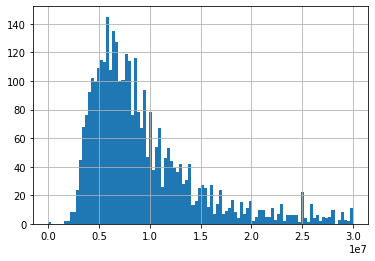

In [75]:
# Изучаем параметры: цена (ограничиваем 30 млн)
data_piter_center['last_price'].hist(bins=100, range = (0,30e6))

In [76]:
# Средняя цена квартиры
data_piter_center['last_price'].mean()

12847428.531803098

Средняя цена квартиры в центре Питера -12.8 млн руб. В общем, распределение похоже на нормальное

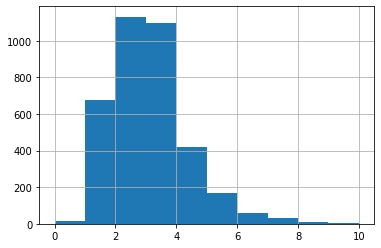

In [77]:
# Изучаем параметры: число комнат
data_piter_center['rooms'].hist(bins=10, range = (0,10))

Большинство продаваемых квартир имеет от 2 до 4 комнат

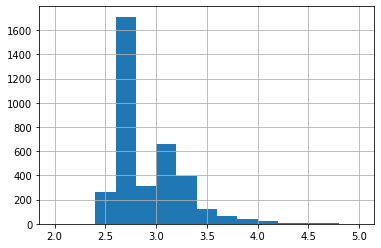

In [78]:
# Изучаем параметры: высота потолков
data_piter_center['ceiling_height'].hist(bins=15, range = (2,5))

In [79]:
# Средняя высота потолков
data_piter_center['ceiling_height'].mean()

2.9205862831858402

Большиство квартир имеют потолки порядка 2.9 метров. При этом, большое количество квартир с высотой потолков более 3-х метров

In [80]:
# Анализируем зависимость цены от разных факторов - центр города
data_piter_center_сorr = data_piter_center[['last_price', 'total_area', 'rooms', 
      'city_centers_nearest', 'first_weekday_exposition', 
      'first_year_exposition', 'first_month_exposition']].corr()
data_piter_center_сorr

,last_price,total_area,rooms,city_centers_nearest,first_weekday_exposition,first_year_exposition,first_month_exposition
last_price,1.000000,0.647313,0.357468,-0.115287,0.017362,-0.070446,0.002240
total_area,0.647313,1.000000,0.758727,-0.212075,0.005336,-0.130429,0.003563
rooms,0.357468,0.758727,1.000000,-0.251589,-0.011880,-0.114197,-0.001767
city_centers_nearest,-0.115287,-0.212075,-0.251589,1.000000,0.011949,0.102617,-0.023732
first_weekday_exposition,0.017362,0.005336,-0.011880,0.011949,1.000000,0.005637,0.031433
first_year_exposition,-0.070446,-0.130429,-0.114197,0.102617,0.005637,1.000000,-0.177128
first_month_exposition,0.002240,0.003563,-0.001767,-0.023732,0.031433,-0.177128,1.000000


In [81]:
# Анализируем зависимость цены от разных факторов - весь город
data_piter_corr = data_piter[['last_price', 'total_area', 'rooms', 
      'city_centers_nearest', 'first_weekday_exposition', 
      'first_year_exposition', 'first_month_exposition']].corr()
data_piter_corr

,last_price,total_area,rooms,city_centers_nearest,first_weekday_exposition,first_year_exposition,first_month_exposition
last_price,1.000000,0.647696,0.363092,-0.240925,0.006754,-0.064541,-0.001189
total_area,0.647696,1.000000,0.760629,-0.335036,-0.001866,-0.125332,-0.005388
rooms,0.363092,0.760629,1.000000,-0.294231,-0.007169,-0.109187,-0.005423
city_centers_nearest,-0.240925,-0.335036,-0.294231,1.000000,0.001103,0.102607,0.012434
first_weekday_exposition,0.006754,-0.001866,-0.007169,0.001103,1.000000,0.009176,-0.001667
first_year_exposition,-0.064541,-0.125332,-0.109187,0.102607,0.009176,1.000000,-0.193744
first_month_exposition,-0.001189,-0.005388,-0.005423,0.012434,-0.001667,-0.193744,1.000000


In [82]:
# Объединяем сравнительыне таблицы
data_piter_сorr_join = data_piter_center_сorr.join(data_piter_corr, lsuffix='_center')

# Вычисляем отклонения показателей в %
for col in data_piter_corr:
    data_piter_сorr_join[f'{col}_delta'] = 100 * (data_piter_сorr_join[f'{col}_center'] - data_piter_сorr_join[col]) / data_piter_сorr_join[col]
    
data_piter_сorr_join[[col for col in data_piter_сorr_join if 'delta' in col]]

,last_price_delta,total_area_delta,rooms_delta,city_centers_nearest_delta,first_weekday_exposition_delta,first_year_exposition_delta,first_month_exposition_delta
last_price,0.000000,-0.059122,-1.549088,-52.148326,157.060099,9.149673,-288.367581
total_area,-0.059122,0.000000,-0.250091,-36.700694,-385.902808,4.066606,-166.119915
rooms,-1.549088,-0.250091,0.000000,-14.492888,65.698923,4.588403,-67.417616
city_centers_nearest,-52.148326,-36.700694,-14.492888,0.000000,983.192557,0.010216,-290.861044
first_weekday_exposition,157.060099,-385.902808,65.698923,983.192557,0.000000,-38.564803,-1985.023707
first_year_exposition,9.149673,4.066606,4.588403,0.010216,-38.564803,0.000000,-8.576032
first_month_exposition,-288.367581,-166.119915,-67.417616,-290.861044,-1985.023707,-8.576032,0.000000


Видим, в общем, аналогичную картину зависимости, как по всем данным.   
Наблюдается на 50% более сильная обратная зависимость цены от расстояния до центра.

### Вывод

- Изучили параметры продаваемых квартир в общем по региону (Питер + область), а также отдельно центр Санкт-Петербурга
- Для выводов использовали как текстовую информацию, так и графическую
- Основные выводы представлены в главе общий вывод

## Общий вывод

Если рассматривать все продаваемые объекты в Санкт-Петербурге и области:
- Средняя площадь продаваемых квартир - 59 м2
- Средняя цена квартиры - порядка 6.3 млн руб
- Среднее число комнат - 2
- Среднее высота потолков стандартная - 2.7 метра
- Квартиры продаются в среднем от 3 до 6 месяцев
- Достаточно сильная корреляция цены от общей площади, что логично
- Чем дальше от центра, тем цена ниже (обратная корреляция)
- Количество комнат не сильно влияет на цену, намного меньше, чем общая площадь квартиры
- Цена от месяца размещения объявления не зависит

Самые дорогие квартиры в:
- Санкт-Петербург - средняя цена м2 порядка 112 тыс.руб
- Пушкин	              - средняя цена м2 порядка 100 тыс.руб
- деревня Кудрово	- средняя цена м2 порядка 90 тыс.руб

Самые дешевые квартиры в:
- Всеволожск	- порядка 68 тыс за м2
- Гатчина	- порядка 67 тыс за м2
- Выборг	- 56 тыс за м2

Если рассматривать квартиры в центре Санкт-Петербурга:
- Средняя площадь квартир больше - 84 метра
- Средняя цена квартир в 2 раза больше - порядка 12,8 млн руб
- Квартиры имеют более высокие потолки - в среднем 2.92 метра. При этом, большое количество квартир с высотой потолков более 3-х метров
- Цена квартиры в центре сильнее  зависит от расстояния от центра
